In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data=pd.read_csv("C:/Users/Rajesh/Documents/me/data_assignments/mod12/crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


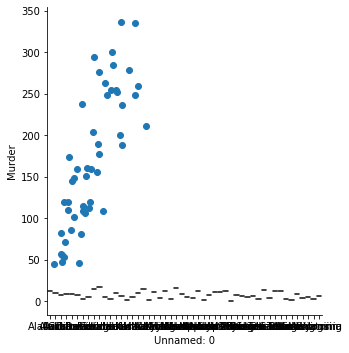

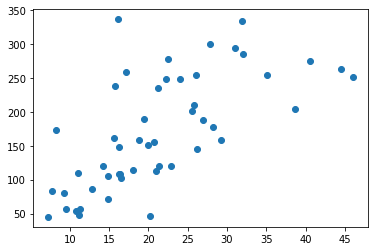

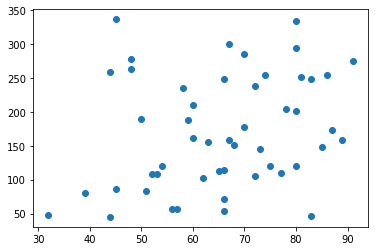

In [8]:
import seaborn as sns
#EDA
data.shape
data.dtypes
data.isna()
data.describe()
data.corr()


sns.catplot(x="Unnamed: 0", y="Murder", kind="box", data=data);
plt.scatter(x=data['Murder'],y=data['Assault'])
plt.show()
plt.scatter(x=data['Rape'],y=data['Assault'])
plt.show()
plt.scatter(x=data['UrbanPop'],y=data['Assault'])
plt.show()

In [17]:
#removing first col because not required
data=data.drop(['Unnamed: 0'],axis=1) #removing first col
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [19]:
#normalizing the data
from sklearn import preprocessing
standardized_data = preprocessing.scale(data)
standardized_data
type(standardized_data)

numpy.ndarray

In [21]:
from scipy.cluster.hierarchy import linkage
z=linkage(standardized_data,method="average",metric="euclidean")

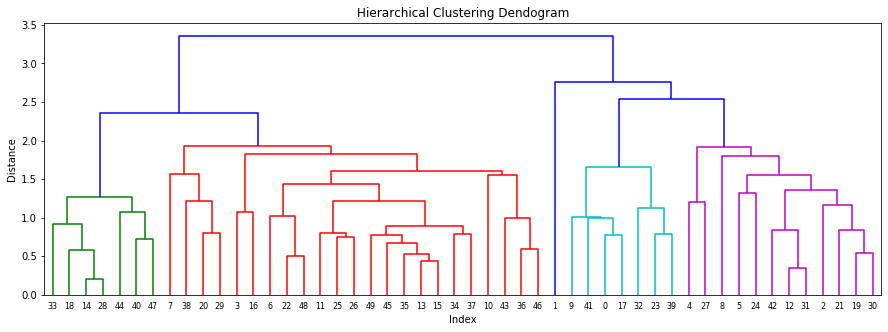

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5));plt.title("Hierarchical Clustering Dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
h_average=AgglomerativeClustering(n_clusters=4,linkage="average",affinity="euclidean").fit(data)

In [29]:
cluster_lables=pd.Series(h_average.labels_)
data['clust']=cluster_lables
data.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1


In [30]:
data=data.iloc[:,[4,0,1,2,3]] #putting cluster first
data.head()

,clust,Murder,Assault,UrbanPop,Rape
0,1,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,1,8.1,294,80,31.0
3,2,8.8,190,50,19.5
4,1,9.0,276,91,40.6


In [31]:
data.groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.471429,263.500000,69.142857,29.000000
2,8.214286,173.285714,70.642857,22.842857
3,14.200000,336.000000,62.500000,24.000000


In [33]:
#pwd
import os
os.getcwd()
data.to_csv("cluster_crime_python.csv",encoding="utf-8")